<a href="https://colab.research.google.com/github/antonia-estefane/problema-fluxo-maximo/blob/main/Trabalho_implementa%C3%A7%C3%A3o_de_grafos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementação do algoritmo de Ford-Fulkerson para problema de fluxo máximo


### Importação das bibliotecas


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict


### Função que ler o arquivo binário

In [ ]:
def ler_grafo_binario(nome_arquivo):
   # Nome do arquivo binário que você deseja ler
  try:
      with open(nome_arquivo, 'rb') as arquivo_binario:
          # Leia o conteúdo do arquivo binário
          dados_binarios = arquivo_binario.read()

          # Faça algo com os dados binários
          return dados_binarios
  except FileNotFoundError:
      print(f'O arquivo {nome_arquivo} não foi encontrado.')
  except Exception as e:
      print(f'Ocorreu um erro ao ler o arquivo: {str(e)}')

### Função que decodifica o arquivo binário e cria o grafo


In [ ]:
def criar_grafo_a_partir_de_bytes(dados_binarios):
    # Decodifique os bytes em uma string
    dados_str = dados_binarios.decode('utf-8')

    # Divida a string em linhas
    linhas = dados_str.strip().split('\n')

    # O número de vértices é a primeira linha
    num_vertices = int(linhas[0])

    # atribuindo a quantidade de vértices a uma váriavel global para ter acesso fora da função
    global nvertices
    nvertices = num_vertices

    # Inicialize o grafo como um dicionário vazio
    grafo = {}

    # Processar as linhas subsequentes para criar as arestas do grafo
    for linha in linhas[1:]:
        partes = linha.split(' ')
        origem, destino, fluxo = int(partes[0]), int(partes[1]), int(partes[2])

        if origem in grafo:
            grafo[origem].append((destino, fluxo))
        else:
            grafo[origem] = [(destino, fluxo)]

    return grafo

### função com o algoritmo de Ford-Fullkerson para obter o fluxo máximo

In [ ]:
def ford_fulkerson(grafo):
 # Encontre o vértice de origem (primeira chave) e de destino (maior vértice)
    source = next(iter(grafo)) # vértice de origem (primeira chave)

    destinos = set()
    for vertices in grafo.values():
        for destino, _ in vertices:
            destinos.add(destino)

    sink = max(destinos) # vértice de destino(maior vértice)
    aux = 0
    for k in grafo.keys():
      if k == sink:
        aux += 1

    # verificando se o vértice de destino final é uma chave do dicionário com a representação do grafo
    if aux == 0:
        grafo[sink] = [] # adiciona o destino final no grafo como uma lista vazia
    aux = 0
    print(f'Origem: {source} \nDestino: {sink}')

    # Inicialização da variável para rastrear o fluxo máximo encontrado no grafo.
    max_flow = 0

    # loop principal
    while True:
        # Inicialização do dicionário parent para rastrear os pais de cada vértice no caminho.
        parent = {}
        # Inicialização do conjunto visited para rastrear os vértices já visitados durante a busca.
        visited = set()
        # Inicialização da fila queue com uma tupla contendo o vértice atual (inicializado como o vértice de origem)
        # e a capacidade mínima encontrada até o momento (inicializada como infinito).
        queue = [(source, float("inf"))]
        visited.add(source)

        # Busca de Caminho Aumentante
        while queue:
            u, min_capacity = queue.pop(0)
            for v, capacity in grafo[u]:
                if v not in visited and capacity > 0:
                    parent[v] = u
                    min_capacity = min(min_capacity, capacity)
                    if v == sink:
                        break

                    queue.append((v, min_capacity))
                    visited.add(v)

        if sink not in parent:
            break

        v = sink
        while v != source:
            u = parent[v]
            for i, (target, capacity) in enumerate(grafo[u]):
                if target == v:
                  # diminuição da capacidade das arestas diretas no caminho encontradas
                    grafo[u][i] = (target, capacity - min_capacity)
                    break
            grafo[v].append((u, min_capacity))
            v = u

        max_flow += min_capacity

    return max_flow



### Representação do grafo

Origem: 1 
Destino: 7
Valor máximo: 21


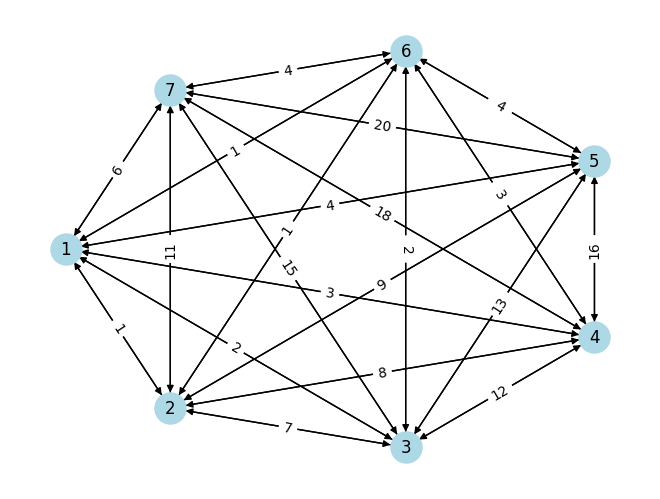

In [ ]:
# obtendo o arquivo com o grafo
grafo_bin = 'fluxo-inst5'

grafo_lido = ler_grafo_binario(grafo_bin)
grafo_gerado = criar_grafo_a_partir_de_bytes(grafo_lido)

valor_max = ford_fulkerson(grafo_gerado)
print(f'Valor máximo: {valor_max}')

# Valores máximos
# inst3 = 2
# inst5 = 10
# inst7 = 21
# inst13 = 78


# Crie um objeto de gráfico direcionado ponderado
G = nx.DiGraph()

# Adicione vértices e arestas com pesos ao gráfico
for source, edges in grafo_gerado.items():
    G.add_node(source)
    for target, weight in edges:
        G.add_edge(source, target, weight=weight)

# Posições dos vértices (para melhor visualização)
pos = nx.shell_layout(G)

# Obtenha os pesos das arestas
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}

# Desenhe o gráfico
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.axis('off')
plt.show()
